![imagine](http://www.nintendo.com/content/dam/noa/en_US/games/switch/a/animal-crossing-new-horizons-switch/animal-crossing-new-horizons-switch-hero.jpg)

![](http://https://www.nintendo.com/content/dam/noa/en_US/games/switch/a/animal-crossing-new-horizons-switch/animal-crossing-new-horizons-switch-hero.jpg)

# **What is crafting & recipes in Animal Crossing: New Horizons?**

Player is starting out on a deserted island, there are very few resources to be had at the beginning of the game - besides raw materials such as sticks and stones.Therefore, the concept of crafting is introduced to allow players to make anything from tools (like the axe and shovel) to clothing to furniture - an expansive new element to the game.

The player gathers what are called "DIY recipes" - which can be acquired both from predictable sources such as Tom Nook, and randomised origins like bottles on the beach and floating balloon presents. Once in hand, players simply select the recipes in their inventories, "learn" them, and then choose them the next time they're at a workbench. Combined with the right materials, this allows everyone to craft to their heart's content.

# Goal
Problem to be solved: Given a set of items, what DIY recipes can you make or are close to make?

In the game, it's easy to figure out which recipes I could make given my raw materials, as game has already marked for us. However, as a player, I often confused by which recipe was close to make. Hoping by designing a function I could solve my problem and find some interesting insights from data exploration process.

# 1. Data preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
recipes = pd.read_csv('C:/Users/ETTTT/Desktop/Animal Crossing/recipes.csv')


### 1.1    Data set structure

First step, I want to have an overview about my dataset. The total missing values seems EXTREMELY high! More than 40% of data are missing! Definitely, we should dive deep into it.

In [3]:
recipes.head(5)

,Name,#1,Material 1,#2,Material 2,#3,Material 3,#4,Material 4,#5,...,Sell,Miles Price,Source,Source Notes,Recipes to Unlock,Version,Category,Serial ID,Internal ID,Unique Entry ID
0,acorn pochette,6,acorn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Balloons,Only available during Fall,0,1.0.0,Bags,2982,632,a9FFbP64fTcJ3Cn5E
1,acoustic guitar,8,softwood,3.0,iron nugget,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Smug villagers,NaN,0,1.0.0,Housewares,406,44,Y62RymJYgbmZEyQon
2,angled signpost,2,hardwood,3.0,softwood,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Lazy villagers,NaN,100,1.0.0,Housewares,440,510,BNiDaivRjGNzCckWw
3,apple chair,10,apple,4.0,wood,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Big Sister villagers,NaN,100,1.0.0,Housewares,1700,189,HB55bMQf4D57ekNf4
4,apple dress,8,apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200,NaN,Big Sister villagers,NaN,100,1.0.0,Dresses,1782,621,KmfTvhh3qeyd6WcFJ


In [4]:
def stats(x) :
    return pd.DataFrame({"Value":['%d '%x.shape[0],x.shape[1],sum(x.isnull().sum().values),
                                  sum(x.isnull().sum().values)/(recipes.shape[0]*recipes.shape[1]),]},
                        index=['Number of observations','Number of variables','Total missing value','% of Total missing value'])
summary_table=pd.DataFrame(stats(recipes))
summary_table

,Value
Number of observations,595
Number of variables,24
Total missing value,5844
% of Total missing value,0.409244


### 1.2 Missing value

I want to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [5]:
# Create missing value table
total = recipes.isnull().sum().sort_values(ascending=False)
percent = (recipes.isnull().sum()/recipes.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
#6,577,0.969748
Material 6,577,0.969748
#5,568,0.954622
Material 5,568,0.954622
Miles Price,566,0.951261
#4,545,0.915966
Material 4,545,0.915966
#3,475,0.798319
Material 3,475,0.798319
Source Notes,408,0.685714


Well.. Let's visualize it!

Actually, based on my understanding of Animal crossing recipes,there is no need to worry about missing values at all. 

* For each recipe, the types of raw materials are varied. For example, the first one :acorn pochette which only need 6 acorns, so column    material2 - material6 are empty.
* Not every item/ recipe would be purchased by miles, it also explain why there are so many missing values in Miles Price.
* Source Notes suggests that some recipes are seansonal limited. It's fair to be incomplete.

My key takeaway here is to  have a fully understanding of your product/object before dealing with data. 
In this case, if I haven't played this game yet, I'd probably delete several columns or the row containng miss value as usual.



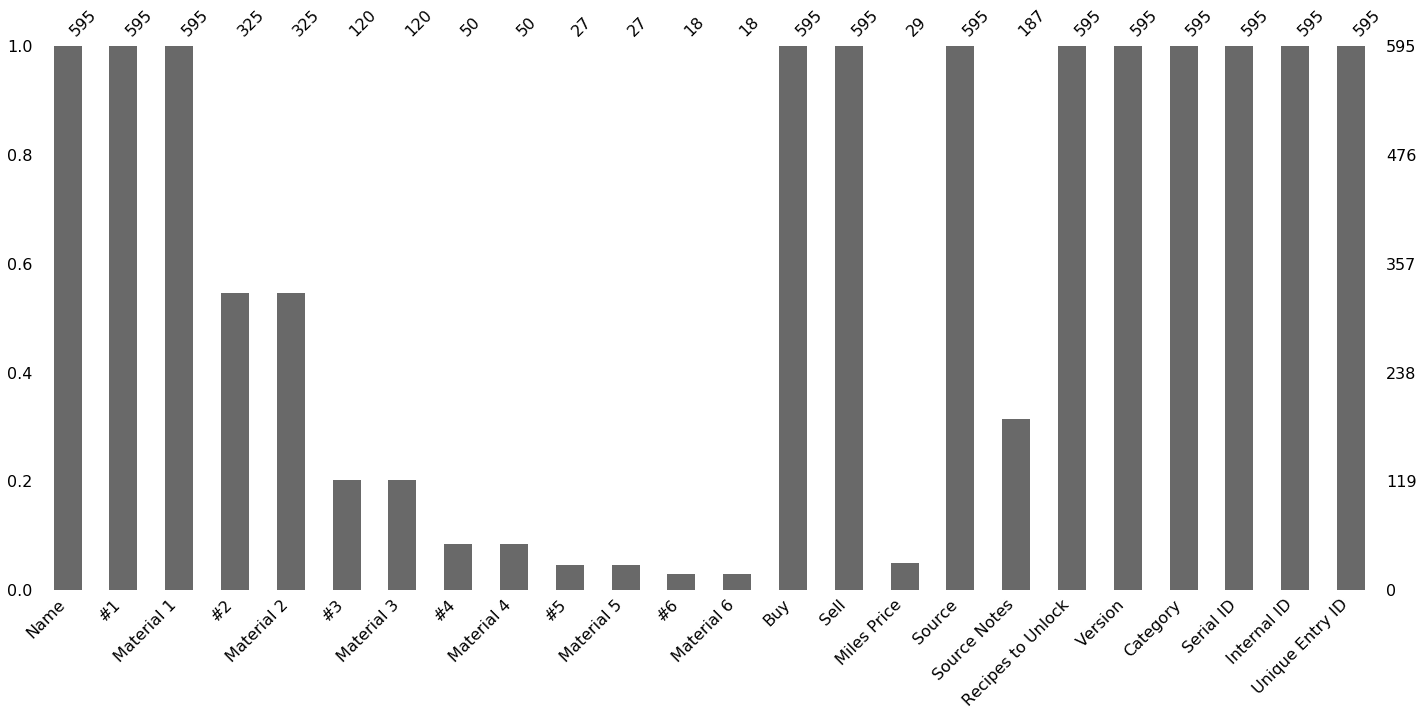

In [12]:
import missingno as msno
msno.bar(recipes)

# 2. Data visualization & insights


There are several interested fingings here!

**Recipe Types:**
* Housewares recipes are far more than any other types. Animal Crossing New Horizons features an extensive list of different furniture objects and other items that you can use to decorate your home and other parts of the island. However, in Animal Crossing World, players don't have rights to design their own furniture, all housewares are predesigned.Players have to gather recpes or exchange with friends to get more rare housewares to decorate their idland. BTW...The competition for the most incredible island was fierce, there are so many island tour videos on YouTube!

* Amount of clothes,bags,shoes,bottom recipes are relative lower than others. The differents from housewares, players could deigin pattern for their outfit to make it unique. ACNH only provide basic type of clothes.The secret to getting the most creative, hilarious and downright bonkers Animal Crossing wallpapers, artworks and outfits in your game is in custom designs — and rather than have to sketch your own, you can scan those that helpful designers have already created straight into your game using QR codes, which made ACNH more social than any other games! Players also create their only community to share outfit ideas or island plannng examples.


**Recipe could buy by Mile**

Interesting! I played ACNH for months and never thought of there are only two types of recipe could purchase by mile point.

**Source**
* You could get 76 kinds of recipes by shooting down balloons with your slingshot! It's despair to know it untill now...
* The most shocking is that character of villagers matters access to recipes!!! OMG!!Don't be picky when you pick your villagers or reject it due to it's snooty or smug. Don't be prejudiced. Great job Nintendo!
* There are also several seasonal limited rescources，like Easter egg bottle/balloon.
* Some recipes offered when you accomplish certan challenge,like shooting 300 ballons,fishing up all 3 trash items etc.

Hope this plot will give you reference where could get recipes!



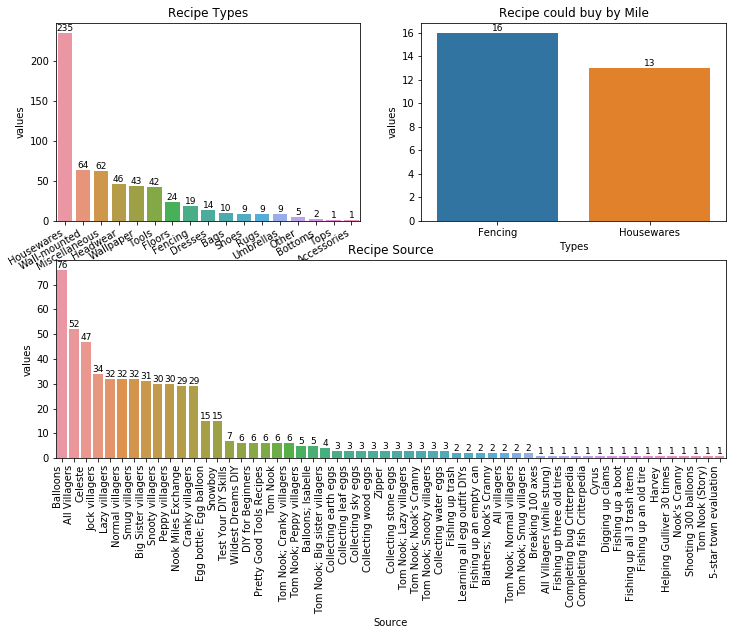

In [7]:
plt.figure(figsize=(12, 8))
##Plot 1 Recipe Types
plt.subplot(221)
Category= pd.DataFrame({'values':recipes.groupby('Category').size().sort_values(ascending=False).values,
                        'index':recipes.groupby('Category').size().sort_values(ascending=False).index.to_list()})
order=recipes.groupby('Category').size().sort_values(ascending=False).index
sns.barplot(y='values',x='index',data=Category,order=order)
ax = plt.gca()
#Adjust xlabels for fitting the graph
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#Add label for each cols
for a,b in zip(Category.index,Category['values']):
    plt.text(a, b+0.001, '%d' % b, ha='center', va= 'bottom',fontsize=9)
plt.title('Recipe Types')
plt.xlabel('Types')


##Plot 2 Recipe could buy by Mile
plt.subplot(222)
recipes_copy=recipes.copy()
recipes_copy.dropna(subset=['Miles Price'],how='any',inplace=True)
Category= pd.DataFrame({'values':recipes_copy.groupby('Category').size().sort_values(ascending=False).values,
                        'index':recipes_copy.groupby('Category').size().sort_values(ascending=False).index.to_list()})
order=recipes_copy.groupby('Category').size().sort_values(ascending=False).index
sns.barplot(y='values',x='index',data=Category,order=order)
ax = plt.gca()
#Add label for each cols
for a,b in zip(Category.index,Category['values']):
    plt.text(a, b+0.001, '%d' % b, ha='center', va= 'bottom',fontsize=9)
#Add label for each cols
plt.xlabel('Types')
plt.title('Recipe could buy by Mile')


##Plot 3 Recipe Source
plt.subplot(212)
Source= pd.DataFrame({'values':recipes.groupby('Source').size().sort_values(ascending=False).values,
                        'index':recipes.groupby('Source').size().sort_values(ascending=False).index.to_list()})
order_Source=recipes.groupby('Source').size().sort_values(ascending=False).index
sns.barplot(y='values',x='index',data=Source,order=order_Source)
ax = plt.gca()
#Adjust xlabels for fitting the graph
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
#Add label for each cols
for a,b in zip(Source.index,Source['values']):
    plt.text(a, b+0.001, '%d' % b, ha='center', va= 'bottom',fontsize=9)
plt.title('Recipe Source')
plt.xlabel('Source')

plt.show()

# 3. Build function


By changing input of **what_in_my_bag** and call function **close_to_make()/ could_make()**, you'll get answer!

Those functions are super easy, only contains several Loop functions. The key here is to convert reicpes into dictionary, then we could compare each number of material of what we have with what we expect.

In [8]:
def close_to_make(what_in_my_bag):
    close_to_make=[]
    df=recipes.iloc[:,:13]
    for i in range(len(df)):
        for j in range(df.shape[1]):   
            if str(df.iloc[i,j]) in what_in_my_bag.keys()  :
                close_to_make.append(str(df.iloc[i,0])) 
                break
    return pd.DataFrame({"What is close to make":close_to_make })
what_in_my_bag={'apple':5 }
close_to_make(what_in_my_bag)

,What is close to make
0,apple chair
1,apple dress
2,apple hat
3,apple rug
4,apple umbrella
5,apple wall
6,fruit basket
7,fruit wreath
8,infused-water dispenser
9,juicy-apple TV


In [9]:
def could_make(what_in_my_bag):
    could_make = []
    df=recipes.iloc[:,:13]
    for i in range(len(df)):
        recipe = {}
        for j in (2, 4, 6, 8, 10, 12):
            if str(df.iloc[i,j]) != 'nan':
                recipe[str(df.iloc[i,j])]=df.iloc[i,j-1]

        count = len(recipe)
        for k in recipe.keys():
            if k in what_in_my_bag.keys():
                if recipe[k] <= what_in_my_bag[k]:
                    count -= 1
            else:
                break
        if count == 0:
            could_make.append(str(df.iloc[i,0]))
    return pd.DataFrame({"What could I make":could_make})
what_in_my_bag={'apple':10,'wood':4 }
could_make(what_in_my_bag)


,What could I make
0,apple chair
1,apple dress
2,apple hat
3,apple rug
4,apple umbrella
5,log stakes
6,log stool
7,paw-print doorplate
8,wooden fish
9,wooden stool
